# Assignment 2 

### Task:Use the merged data frame from Assignment 1 for this assignment. This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame). You will be predicting PM2.5 levels using a machine learning model in this assignment

In [1]:
#Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#Stack overfolw
#importing and merging all data sets
import glob 
path = r'C:\Users\sachi\Downloads\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_merged = pd.concat(li, axis=0, ignore_index=True)


In [110]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
No         420768 non-null int64
year       420768 non-null int64
month      420768 non-null int64
day        420768 non-null int64
hour       420768 non-null int64
PM2.5      412029 non-null float64
PM10       414319 non-null float64
SO2        411747 non-null float64
NO2        408652 non-null float64
CO         400067 non-null float64
O3         407491 non-null float64
TEMP       420370 non-null float64
PRES       420375 non-null float64
DEWP       420365 non-null float64
RAIN       420378 non-null float64
wd         418946 non-null object
WSPM       420450 non-null float64
station    420768 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [111]:
#Renaming the columns
df1=df_merged.rename({'wd' : 'wind_direction',
'DEWP' : 'dew_point_temp',
'TEMP' : 'temp',
'RAIN' : 'rain',
'WSPM' : 'wind_speed',
'PRES' : 'pressure'},axis=1)

In [112]:
#Changed to categorical variable
df1.year = df1.year.astype('category')
df1.month=df1.month.astype('category')

In [113]:
df1.dtypes

No                   int64
year              category
month             category
day                  int64
hour                 int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
temp               float64
pressure           float64
dew_point_temp     float64
rain               float64
wind_direction      object
wind_speed         float64
station             object
dtype: object

In [114]:
#removing No column as it is not necessary 
del df1['No']

In [115]:
#Count of null values
df1.isna().sum()

year                  0
month                 0
day                   0
hour                  0
PM2.5              8739
PM10               6449
SO2                9021
NO2               12116
CO                20701
O3                13277
temp                398
pressure            393
dew_point_temp      403
rain                390
wind_direction     1822
wind_speed          318
station               0
dtype: int64

In [116]:
df2=df1.dropna()

In [117]:
df2.isna().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
temp              0
pressure          0
dew_point_temp    0
rain              0
wind_direction    0
wind_speed        0
station           0
dtype: int64

In [118]:
#Removing the outliers
Q1=df2['PM2.5'].quantile(0.25)
Q3=df2['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df2[(df2['PM2.5']<(Q1-1.5*IQR))|(df2['PM2.5']>(Q3+1.5*IQR))]
print(df_out.shape)
data=df2[~((df_merged['PM2.5']<(Q1-1.5*IQR))|(df2['PM2.5']>(Q3+1.5*IQR)))]
data.shape

91.0
(17638, 17)


C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(364530, 17)

In [398]:
data['station'].value_counts()

Changping        31647
Tiantan          31295
Nongzhanguan     31222
Wanshouxigong    31015
Gucheng          30875
Huairou          30765
Guanyuan         30703
Aotizhongxin     30250
Dingling         30249
Wanliu           29126
Shunyi           28757
Dongsi           28626
Name: station, dtype: int64

### Task:Take a subset of the dataset(10%-15% of the dataset(because hyper-parameter search will take more time to compute)) for modelling

In [399]:
#stack_overflow
sample_data=data.groupby('station').apply(lambda x: x.sample( frac=0.15))

In [400]:
sample_data['station'].value_counts()

Changping        4747
Tiantan          4694
Nongzhanguan     4683
Wanshouxigong    4652
Gucheng          4631
Huairou          4615
Guanyuan         4605
Aotizhongxin     4538
Dingling         4537
Wanliu           4369
Shunyi           4314
Dongsi           4294
Name: station, dtype: int64

### Task : Remove variables if you find multicollinearity between independent variables.

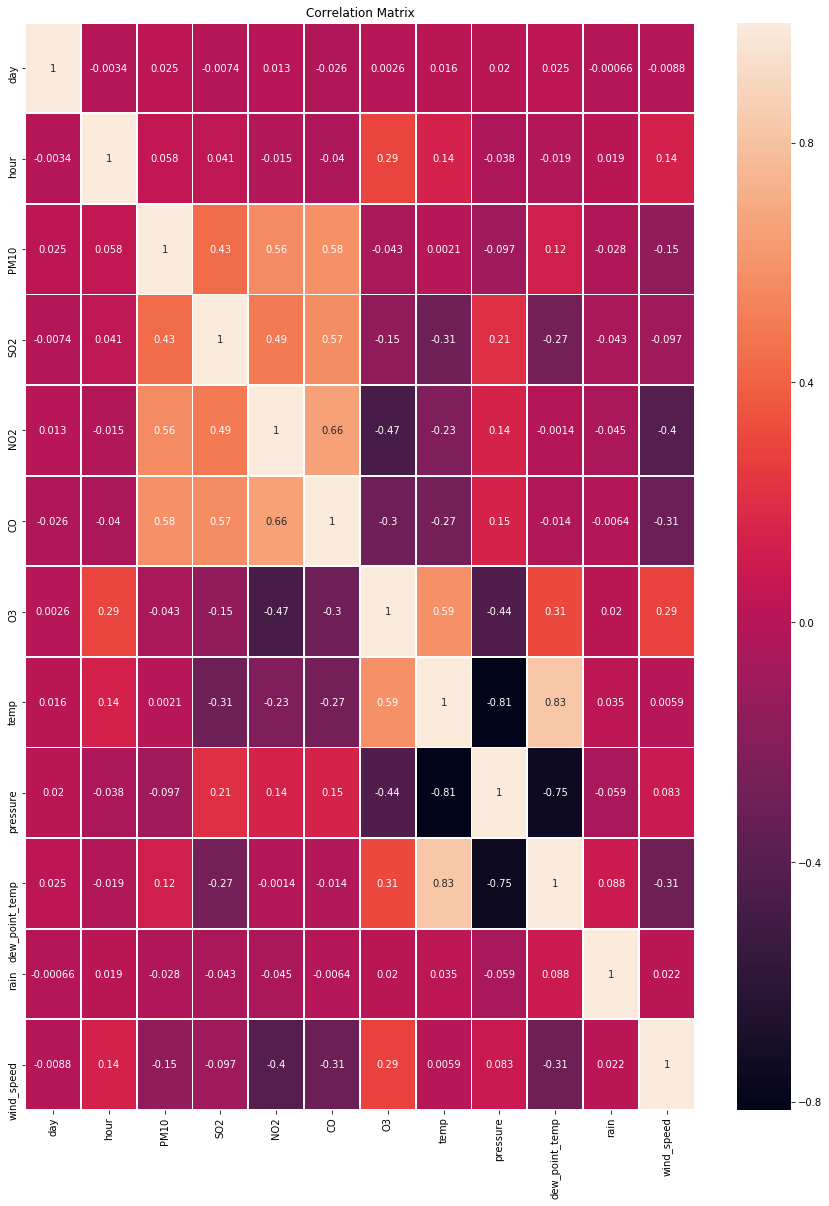

In [468]:
#checking the relation between independent variables
#a
plt.figure(figsize=(15, 20))
plt.title('Correlation Matrix')
sns.heatmap(sample_data.iloc[:,sample_data.columns != 'PM2.5'].corr(), annot=True, linewidth = 0.75)
plt.show()

we can observe from the above plot that we have correlation coefficient between temp and dew_point_temp = 0.82, which can cause multicollinearity so removing one of them.


In [469]:
#Dropping dew_point_column due to high correlation with tamp variable, that can cause multicollinearity
sample_data1=sample_data.drop(columns=['dew_point_temp'])

In [470]:
sample_data1.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'temp', 'pressure', 'rain', 'wind_direction', 'wind_speed',
       'station'],
      dtype='object')

### Task Reindex the columns such that target variable(PM2.5) should be at the last in the column index.

In [125]:
sample_data1=sample_data1[['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'temp', 'pressure', 'rain', 'wind_direction', 'wind_speed',
       'station','PM2.5']]

In [126]:
sample_data1.head(2)

year month  day  hour  PM10  SO2   NO2      CO     O3  \
station                                                                     
Aotizhongxin 27829  2016     5    3    13  33.0  2.0  14.0   200.0  117.0   
             14857  2014    11   10     1  93.0  4.0  97.0  1500.0    2.0   

                    temp  pressure  rain wind_direction  wind_speed  \
station                                                               
Aotizhongxin 27829  24.5     995.5   0.0             NW         5.7   
             14857   1.0    1024.0   0.0            ENE         0.8   

                         station  PM2.5  
station                                  
Aotizhongxin 27829  Aotizhongxin   15.0  
             14857  Aotizhongxin   93.0





### Task :Preprocess the data (Encode the categorical features and Standardize the numerical features) of merged dataset




In [127]:
sample_data1.dtypes


year              category
month             category
day                  int64
hour                 int64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
temp               float64
pressure           float64
rain               float64
wind_direction      object
wind_speed         float64
station             object
PM2.5              float64
dtype: object

In [146]:
sample_data1.head()

year month  day  hour   PM10  SO2   NO2      CO     O3  \
station                                                                      
Aotizhongxin 27829  2016     5    3    13   33.0  2.0  14.0   200.0  117.0   
             14857  2014    11   10     1   93.0  4.0  97.0  1500.0    2.0   
             22100  2015     9    7    20   63.0  2.0  41.0   700.0  141.0   
             33022  2016    12    5    22   28.0  2.0  68.0   700.0   11.0   
             18267  2015     4    1     3  115.0  3.0  96.0  1100.0    2.0   

                    temp  pressure  rain wind_direction  wind_speed  \
station                                                               
Aotizhongxin 27829  24.5     995.5   0.0             NW         5.7   
             14857   1.0    1024.0   0.0            ENE         0.8   
             22100  25.3    1009.2   0.0             SW         2.2   
             33022  -0.2    1027.2   0.0             SW         0.6   
             18267   6.3    1018.5   0.0             NW         0.2   

                         station  PM2.5  
station                                  
Aotizhongxin 27829  Aotizhongxin   15.0  
             14857  Aotizhongxin   93.0  
             22100  Aotizhongxin   26.0  
             33022  Aotizhongxin   15.0  
             18267  Aotizhongxin   81.0

In [7]:
a = sample_data1.iloc[:,:-1]
b = sample_data1.iloc[:,-1]

NameError: name 'sample_data1' is not defined

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

Creating Input and traget vector for model

In [6]:
X = sample_data.iloc[:,:-1].values
y = sample_data.iloc[:,-1].values

NameError: name 'sample_data1' is not defined

In [241]:
##Handling categorical and object variables by converting them into numerical labels.

In [242]:
#list of cetegorical columns ##Those column has other than numerical values
li=[0,1,12,14]
li

[0, 1, 12, 14]

In [402]:
#Applying labelencoder to all non numerical columns in the data set
for i in li:
        X[:,i] = labelencoder_X.fit_transform(X[:,i])

In [465]:
#Applying OneHotcoder to categorical Columns this will create the seperate columns for all the levels in the different non numerical columns so that we could use this in the model building.
onehotencoder = OneHotEncoder(categorical_features = li )
X = onehotencoder.fit_transform(X).toarray()

C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sachi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [3]:
y=labelencoder_X.fit_transform(y)

NameError: name 'labelencoder_X' is not defined

In [466]:
sample_data1.dtypes


year              category
month             category
day                  int64
hour                 int64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
temp               float64
pressure           float64
rain               float64
wind_direction      object
wind_speed         float64
station             object
PM2.5              float64
dtype: object

In [467]:
y.shape


(54679,)

In [407]:
X.shape

(54679, 64)

### Task: Make an 80-20 stratified split based on the target data



In [248]:
#Now splitting this data into Train and Test using Stratified sampling

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=sample_data1['station'])

In [ ]:
#Standardising the vecotrs

In [284]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [251]:
y_train

array([ 16., 150.,  51., ..., 135.,  65.,  39.])

In [252]:
X_train

array([[-0.4855746 , -0.57383939,  1.68048299, ..., -0.3579348 ,
        -0.0809224 ,  0.25390565],
       [-0.4855746 ,  1.7426479 , -0.59506702, ..., -0.62308511,
        -0.0809224 , -0.06309505],
       [ 2.05941579, -0.57383939, -0.59506702, ..., -1.57952018,
        -0.0809224 , -1.09334732],
       ...,
       [-0.4855746 , -0.57383939, -0.59506702, ..., -1.10603748,
        -0.0809224 , -0.2215954 ],
       [ 2.05941579, -0.57383939, -0.59506702, ..., -1.08709817,
        -0.0809224 , -0.06309505],
       [-0.4855746 , -0.57383939, -0.59506702, ..., -0.85035681,
        -0.0809224 , -0.77634662]])

### Task Build a stochastic gradient descent regressor, train the model



### Model Building

In [285]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
sgd_regressor = linear_model.SGDRegressor()
sgd_regressor.fit(X_train, y_train)
type(sgd_regressor)


sklearn.linear_model.stochastic_gradient.SGDRegressor

In [286]:
sgd_regressor.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### Task: Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics

In [330]:
y_train_pred=sgd_regressor.predict(X_train)

In [331]:
y_train.mean(),y_train.min(),y_train.max()

(67.27299453626867, 2.0, 247.0)

In [408]:
y_train_pred.mean(),y_train_pred.min(),y_train_pred.max()

(67.49702020180962, -27.26463617177545, 422.7109064472593)

### Evaluation on Training data

•	Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

Since the Target variable in this data set is continuous and applied model is regression.
To evaluate the model we can score: 
R2 value: which tells us the variation in target variable explained by model.
Mean square and mean absolute error: These values gives us the idea of distance between actual values and predicted values.
We may apply median absolute error as well to find out errors related to median.


In [409]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [411]:

 print("Mean sqaure error:",round(mean_squared_error(y_train, y_train_pred),2))
 print("r2_score:",round(r2_score(y_train, y_train_pred),2))
 print("mean_absolute_error:",round(mean_absolute_error(y_train, y_train_pred),2))
 print("explained_variance_score:",round(explained_variance_score(y_train, y_train_pred),2)) 
 


Mean sqaure error: 756.48
r2_score: 0.78
mean_absolute_error: 18.95
explained_variance_score: 0.78


### Evaluation on Test data

In [412]:
y_test_pred=sgd_regressor.predict(X_test)

In [413]:
 print("Mean sqaure error:",round(mean_squared_error(y_test, y_test_pred),2))
 print("r2_score:",round(r2_score(y_test, y_test_pred),2))
 print("mean_absolute_error:",round(mean_absolute_error(y_test, y_test_pred),2))
 print("explained_variance_score:",round(explained_variance_score(y_test, y_test_pred),2)) 

Mean sqaure error: 774.26
r2_score: 0.77
mean_absolute_error: 19.2
explained_variance_score: 0.77


### Hyperparameter tuning


### Task :List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 

These are hyper parameters which can be tuned in SGD with their default values.
alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False

In [354]:
###parameter tuning ## Regularization by changing penalty l2 to l1

In [355]:
sgd_regressor1 = linear_model.SGDRegressor(penalty='l1',)
sgd_regressor1.fit(X_train, y_train)
y_test_pred1=sgd_regressor1.predict(X_test)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [414]:
 print("Mean sqaure error:",round(mean_squared_error(y_test, y_test_pred1),2))
 print("r2_score:",round(r2_score(y_test, y_test_pred1),2))
 print("mean_absolute_error:",round(mean_absolute_error(y_test, y_test_pred1),2))
 print("explained_variance_score:",round(explained_variance_score(y_test, y_test_pred1),2)) 

Mean sqaure error: 771.52
r2_score: 0.77
mean_absolute_error: 19.08
explained_variance_score: 0.77


Mean absolute error and mean squared error has decreased slightly in the model,Here we can see model has  slightly improved as mean squared error decreased to 771.52 from 774.26.

In [ ]:
###parameter tuning ## Regularization by changing penalty l2 to l1, and max_iter 1000 to 1300,random_state=41

In [429]:
sgd_regressor2 = linear_model.SGDRegressor(penalty='l1',max_iter=1300,random_state=41)
sgd_regressor2.fit(X_train, y_train)
y_test_pred2=sgd_regressor2.predict(X_test)
print("Mean sqaure error:",round(mean_squared_error(y_test, y_test_pred2),2))
print("r2_score:",round(r2_score(y_test, y_test_pred2),2))
print("mean_absolute_error:",round(mean_absolute_error(y_test, y_test_pred2),2))
print("explained_variance_score:",round(explained_variance_score(y_test, y_test_pred2),2)) 

Mean sqaure error: 769.41
r2_score: 0.77
mean_absolute_error: 19.24
explained_variance_score: 0.77


In [425]:
###parameter tuning ## Regularization by changing penalty l2 to l1, and max_iter 1000 to 1300,random_state=51,average=True

In [464]:
sgd_regressor3 = linear_model.SGDRegressor(alpha=0.0001,l1_ratio=0.15,penalty='l1',average=True,max_iter=1300,random_state=41)
sgd_regressor3.fit(X_train, y_train)
y_test_pred3=sgd_regressor3.predict(X_test)
print("Mean sqaure error:",round(mean_squared_error(y_test, y_test_pred3),2))
print("r2_score:",round(r2_score(y_test, y_test_pred3),2))
print("mean_absolute_error:",round(mean_absolute_error(y_test, y_test_pred3),2))
print("explained_variance_score:",round(explained_variance_score(y_test, y_test_pred3),2))

Mean sqaure error: 766.27
r2_score: 0.77
mean_absolute_error: 19.03
explained_variance_score: 0.77


After trying several values for different parameters of model, the observation is r2 value is either 0.77 or lower. Mean square error and mean absolute error are changing improving slightly based on the data set.(15%  of merged data set).
##This result tells us there is 33 percent enexplained variation in target data based chosen input data.

In [328]:
print("labels in year column:",len(sample_data['year'].unique()))

labels in year column: 5


In [329]:
print("labels in month column:",len(sample_data['month'].unique()))

labels in month column: 12


[2013, 2015, 2014, 2016, 2017]

None


[8, 12, 7, 11, 6, 4, 9, 10, 1, 3, 2, 5]

[1, 2, 3, 4, 6, 7, 8]

NameError: name 'X' is not defined

year              category
month             category
day                  int64
hour                 int64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
temp               float64
pressure           float64
rain               float64
wind_direction    category
wind_speed         float64
station           category
PM2.5              float64
dtype: object

In [42]:




• Preprocess the data (Encode the categorical features and Standardize the numerical features) of merged dataset

• Build a stochastic gradient descent regressor, train the model

• Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

• List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

Optional(no extra credit): Try predicting the target variable with SVM regressor or any other ML model and show the improvement.

SyntaxError: invalid character in identifier (<ipython-input-42-5a491046f984>, line 1)